#PROBLEM STATEMENT

Develop a model to predict the price of Airbnb listings in New York City based on features such as location, room type, number of reviews, availability, and amenities. Additionally, analyze trends to identify key factors that influence pricing and provide insights for hosts and guests.it contains 48895 rows and 16 columns

#1 UNDERSTANDING DATA

id: A unique identifier for each Airbnb listing.

name: The name of the Airbnb listing (e.g., "Cozy Apartment in Manhattan").

host_id: A unique identifier for each host.

host_name: The name of the host (e.g., "John," "Sarah").

neighbourhood: The neighborhood or area where the listing is located (e.g., "Brooklyn," "Manhattan").

latitude: The latitude coordinate of the listing's location.

longitude: The longitude coordinate of the listing's location.

room_type: The type of room offered (e.g., "Entire home/apt," "Private room," "Shared room").

price: The nightly cost of the listing (in USD).

minimum_nights: The minimum number of nights required to book the listing.

number_of_reviews: The total number of reviews the listing has received.

last_review: The date of the most recent review for the listing.

reviews_per_month: The average number of reviews the listing receives per month.

calculated_host_listings_count: The number of listings a host has.

availability_365: The number of days the listing is available for booking in a year.



link:https://www.kaggle.com/datasets/chadra/ab-nyc-2019

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
df=pd.read_csv('/content/AB_NYC_2019 - AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


#2.DATA CLEANING
data cleaning refers to clean the null values,wrong formats,duplicates,un wanted columns that not related to the target variable.

In [ ]:
df.drop_duplicates(inplace=True)    #in this step we check duplicates in this dataset.if there is any duplicates we have to drop it.
                               # there is no duplicates in this dataset

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()  #in this step we chek the null values.

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
10052/48895*100

20.55833929849678

In [ ]:
df['reviews_per_month']=df['reviews_per_month'].fillna(df['reviews_per_month'].mean())
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,1.373221,6,2


In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])
print(df['last_review'].isnull().sum())  # Should print 0


0


In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# df['name'].fillna(df['name'].mode()[0],inplace=True)
# df
df['name'] = df['name'].fillna(df['name'].mode()[0])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# df['host_name']=df['host_name'].fillna(df['host_name'].mode())
# df['host_name'].fillna(df['host_name'].mode()[0],inplace=True)
# df
df['host_name'] = df['host_name'].fillna(df['host_name'].mode()[0])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In data cleaning process we drop the unwanted columns and replace the null values with statistical functions with using fillna().

#3.DESCRIPTIVE STATISTICS

Descriptive statistics in Exploratory Data Analysis (EDA) refers to summarizing and presenting the main features of a dataset in a quantitative and visual manner.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-11-26 22:07:49.299519488,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-06-14 00:00:00,1.220000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.497775,32.952519,131.622289


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,2019-06-23,1.373221,1,23


#4.DATA VISULIZATION

Data visualization is the process of representing data in a graphical or visual format, allowing people to better understand complex data patterns, trends, relationships, and insights.

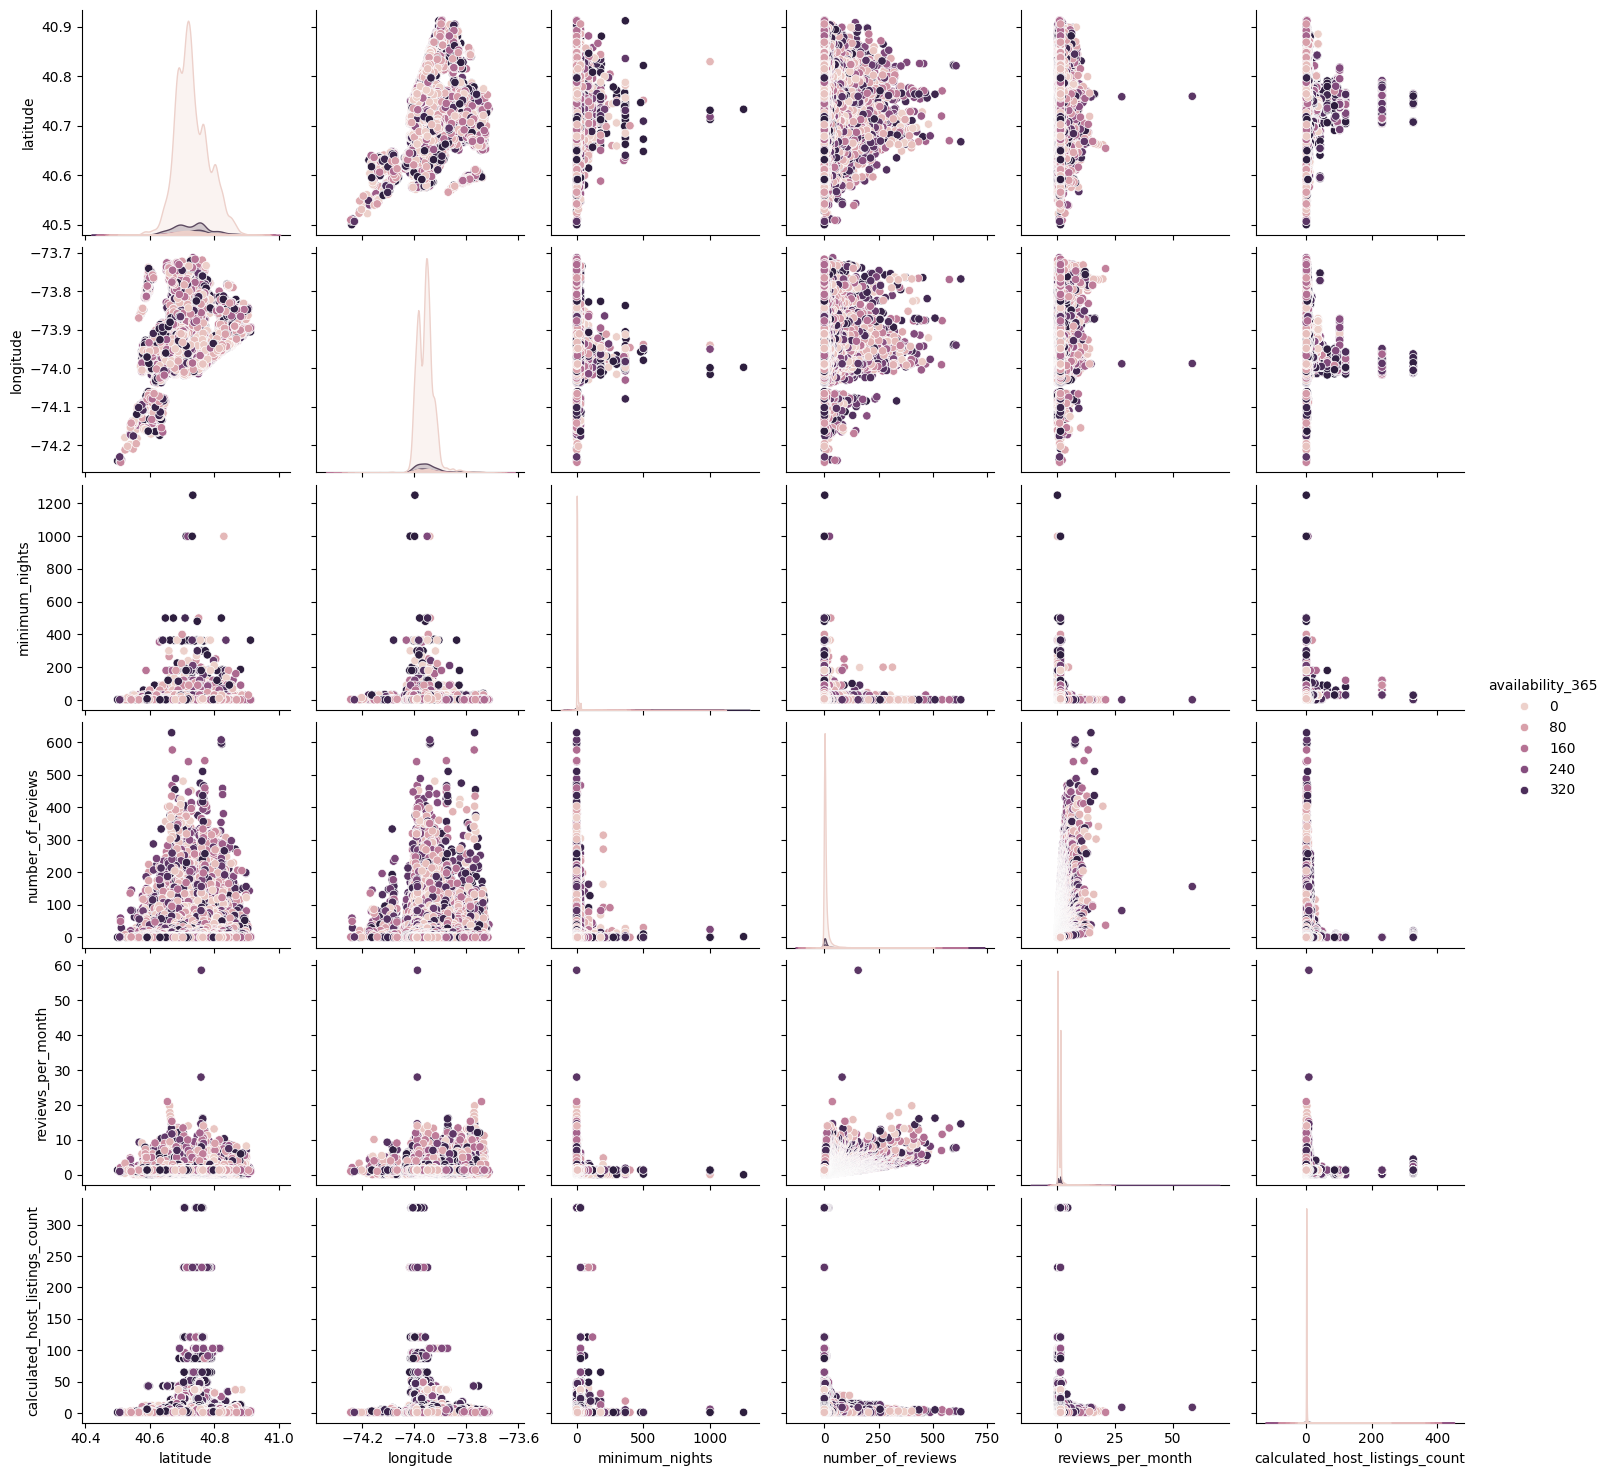

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['neighbourhood','neighbourhood_group','latitude','longitude','room_type','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']],hue='availability_365')
plt.show()

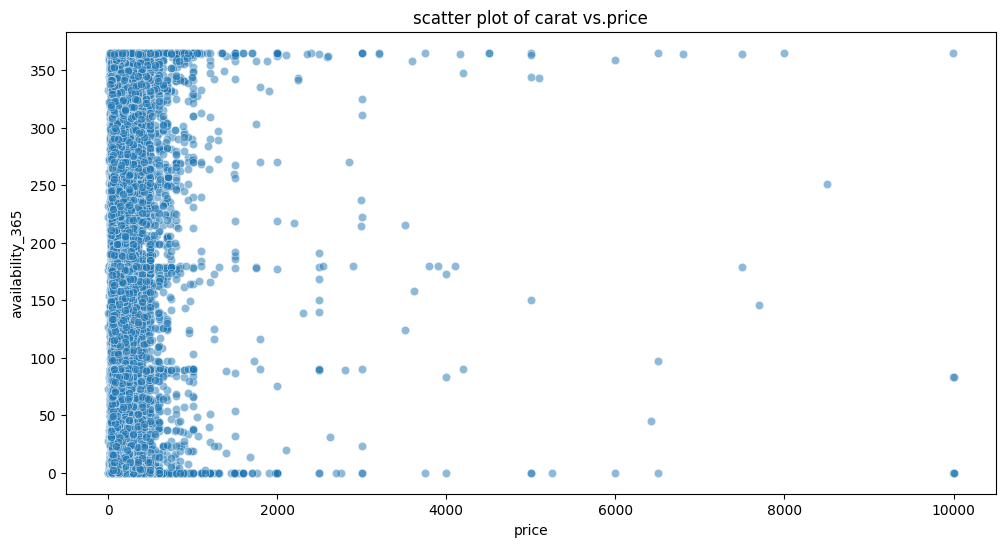

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='price',y='availability_365',alpha=0.5)
plt.title('scatter plot of carat vs.price')
plt.xlabel('price')
plt.ylabel('availability_365')
plt.show()


in my dataset newyourk city first i check the relation of a feature 'price'.price is our target variable.then chek the relation between two variables that related to the target varaiable 'price' and 'avalibility'.Then visualiz all features realtion between target variable and scatter plot.

#5.CORRELATION ANALYSIS
Correlation is a statistical measure that describes the strength and direction of a relationship between two variables. It is used to determine how closely two variables move together.

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['id'] = labelencoder.fit_transform(df['id'])
df['name'] = labelencoder.fit_transform(df['name'])
df['host_id'] = labelencoder.fit_transform(df['host_id'])
df['host_name'] = labelencoder.fit_transform(df['host_name'])
df['neighbourhood_group']=labelencoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood']=labelencoder.fit_transform(df['neighbourhood'])
df['latitude']=labelencoder.fit_transform(df['latitude'])
df['longitude']=labelencoder.fit_transform(df['longitude'])
df['room_type']=labelencoder.fit_transform(df['room_type'])
df['minimum_nights']=labelencoder.fit_transform(df['minimum_nights'])
df['number_of_reviews']=labelencoder.fit_transform(df['number_of_reviews'])
df['last_review']=labelencoder.fit_transform(df['last_review'])
df['reviews_per_month']=labelencoder.fit_transform(df['reviews_per_month'])
df['calculated_host_listings_count']=labelencoder.fit_transform(df['calculated_host_listings_count'])
df['availability_365']=labelencoder.fit_transform(df['availability_365'])

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,12317,2,4989,1,108,2025,4568,1,149,0,9,1501,20,5,365
1,1,37443,3,4785,2,127,11521,3450,0,225,0,45,1715,37,1,355
2,2,43528,13,2909,2,94,16012,7576,1,150,2,0,1748,137,0,365
3,3,14772,14,6203,1,41,4964,5791,0,89,0,270,1760,464,0,194
4,4,18681,18,5923,2,61,15154,7367,0,80,9,9,1532,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,48890,11636,10255,9051,1,13,4320,6772,1,70,1,0,1748,137,1,9
48891,48891,3511,8945,6776,1,28,6571,8420,1,40,3,0,1748,137,1,36
48892,48892,42449,17488,4263,2,94,16395,6900,0,115,9,0,1748,137,0,27
48893,48893,2563,19748,10190,2,95,11891,2716,2,55,0,0,1748,137,5,2


In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt
# import pandas as pd

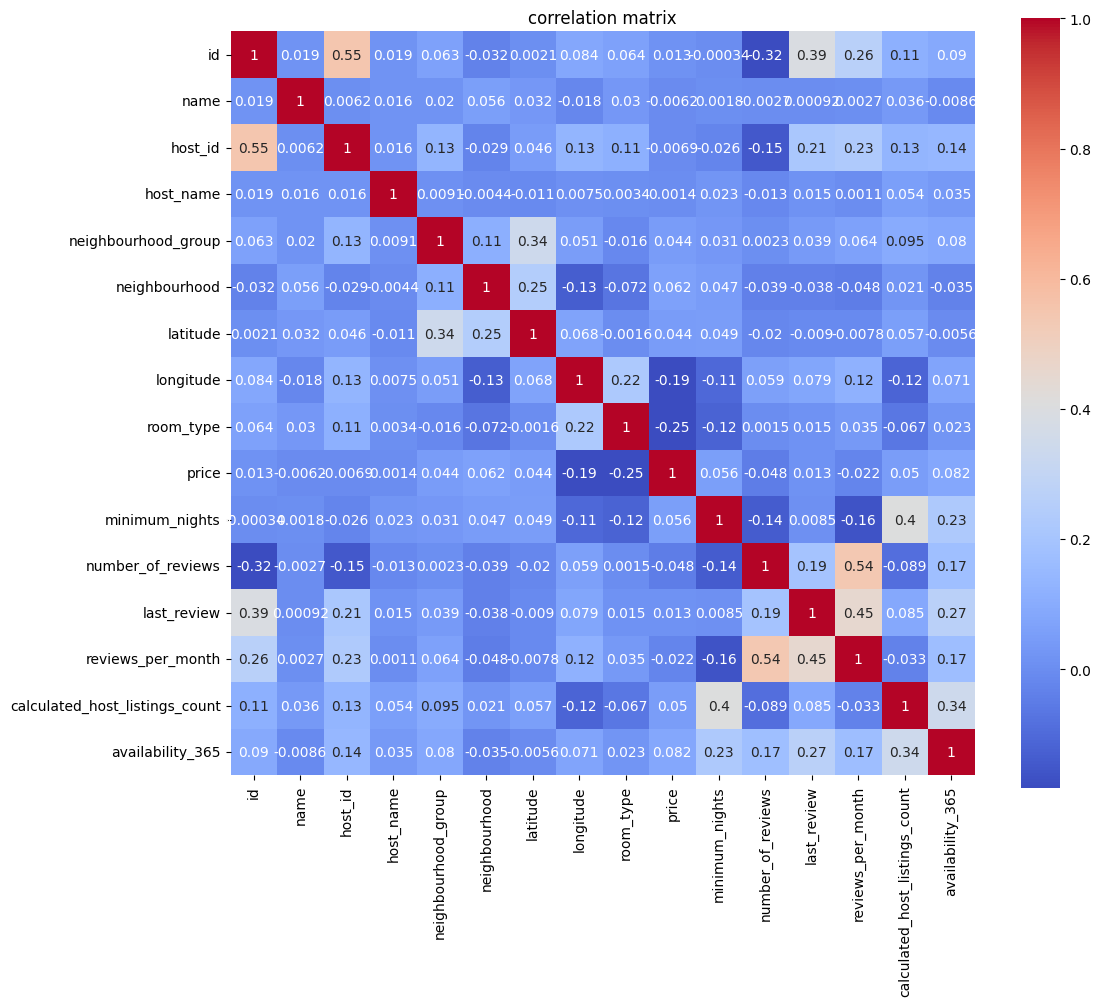

In [ ]:
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',annot_kws={'size': 10}, linewidths=0, robust=True,square=True)
plt.title('correlation matrix')
plt.show()

In [ ]:
corr_matrix   #corr_matrix using for to konw the relation between numeric variables in the dataset.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.018580,0.550936,0.019438,0.062800,-0.032478,0.002068,0.084140,0.063961,0.012623,-0.000338,-0.323301,0.391907,0.262913,0.114885,0.090043
name,0.018580,1.000000,0.006191,0.015689,0.019822,0.055939,0.031682,-0.017637,0.030017,-0.006171,0.001778,-0.002714,0.000918,0.002702,0.036107,-0.008553
host_id,0.550936,0.006191,1.000000,0.016119,0.131418,-0.028520,0.045587,0.131232,0.113799,-0.006912,-0.025702,-0.147601,0.211778,0.231229,0.134374,0.142129
host_name,0.019438,0.015689,0.016119,1.000000,0.009074,-0.004395,-0.010704,0.007490,0.003432,0.001396,0.023194,-0.012880,0.014608,0.001096,0.053836,0.034747
neighbourhood_group,0.062800,0.019822,0.131418,0.009074,1.000000,0.111333,0.342794,0.051377,-0.016337,0.044246,0.031046,0.002304,0.039038,0.063575,0.094696,0.080450
neighbourhood,-0.032478,0.055939,-0.028520,-0.004395,0.111333,1.000000,0.245792,-0.134157,-0.071964,0.062057,0.047079,-0.038869,-0.037885,-0.048355,0.021063,-0.034655
latitude,0.002068,0.031682,0.045587,-0.010704,0.342794,0.245792,1.000000,0.067578,-0.001626,0.043808,0.048628,-0.019730,-0.009038,-0.007830,0.056799,-0.005632
longitude,0.084140,-0.017637,0.131232,0.007490,0.051377,-0.134157,0.067578,1.000000,0.222483,-0.185520,-0.105408,0.059168,0.078917,0.118811,-0.115574,0.071173
room_type,0.063961,0.030017,0.113799,0.003432,-0.016337,-0.071964,-0.001626,0.222483,1.000000,-0.249350,-0.121362,0.001520,0.015091,0.034970,-0.067291,0.022500
price,0.012623,-0.006171,-0.006912,0.001396,0.044246,0.062057,0.043808,-0.185520,-0.249350,1.000000,0.055650,-0.048302,0.012860,-0.021835,0.049990,0.081829


In correlation analysis first we have to convert the all values to numerical.Because if we want to know the correlation of features we should convert to numerics so we can easly correalted.For better understanding we mostly use heatmap.

#6.OUTLIER DECTECTION
Outlier detection involves identifying data points that are significantly different from the rest of the dataset.

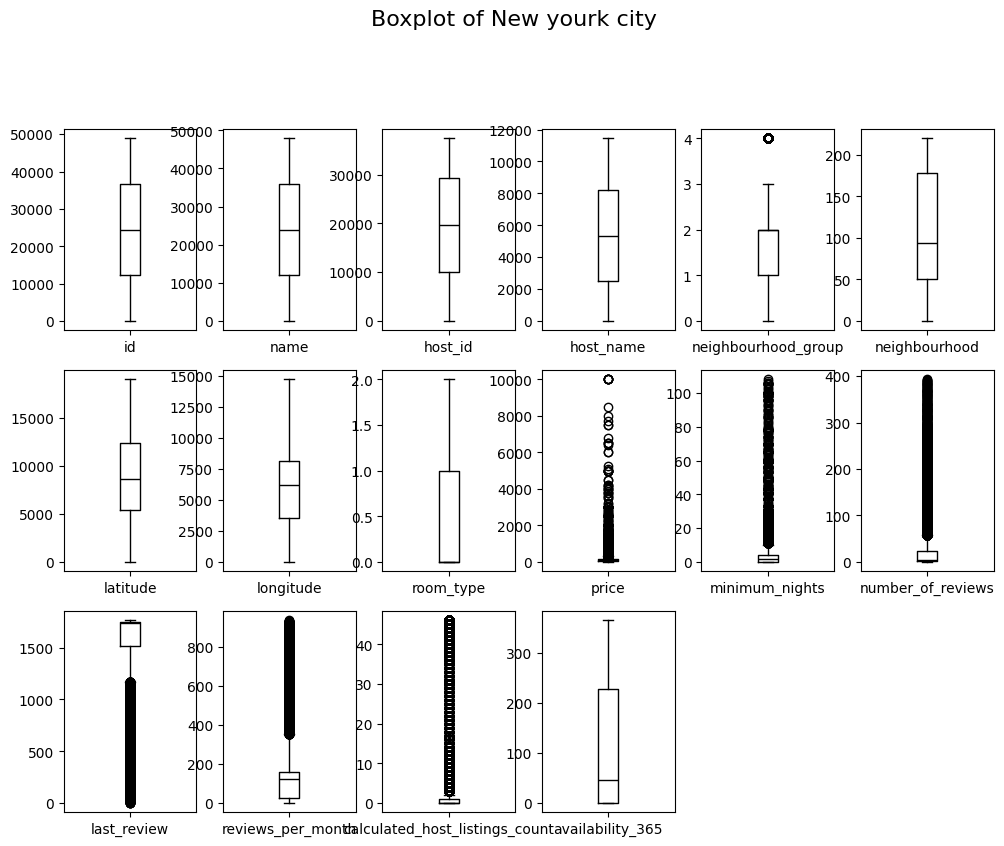

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,12),color='black')
plt.suptitle('Boxplot of New yourk city',fontsize=16)
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)# First quartile (25% )
    Q3 = df[column].quantile(0.75)  # Third quartile (75% )
    IQR = Q3 - Q1                   # Interquartile range (spread of middle 50% of data)

    lower_bound = Q1 - 1.5 * IQR # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR # Upper limit for outliers
    # Keep only rows within the bounds (remove outliers)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to multiple columns
for col in ['minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count']:
    df = remove_outliers_iqr(df, col)

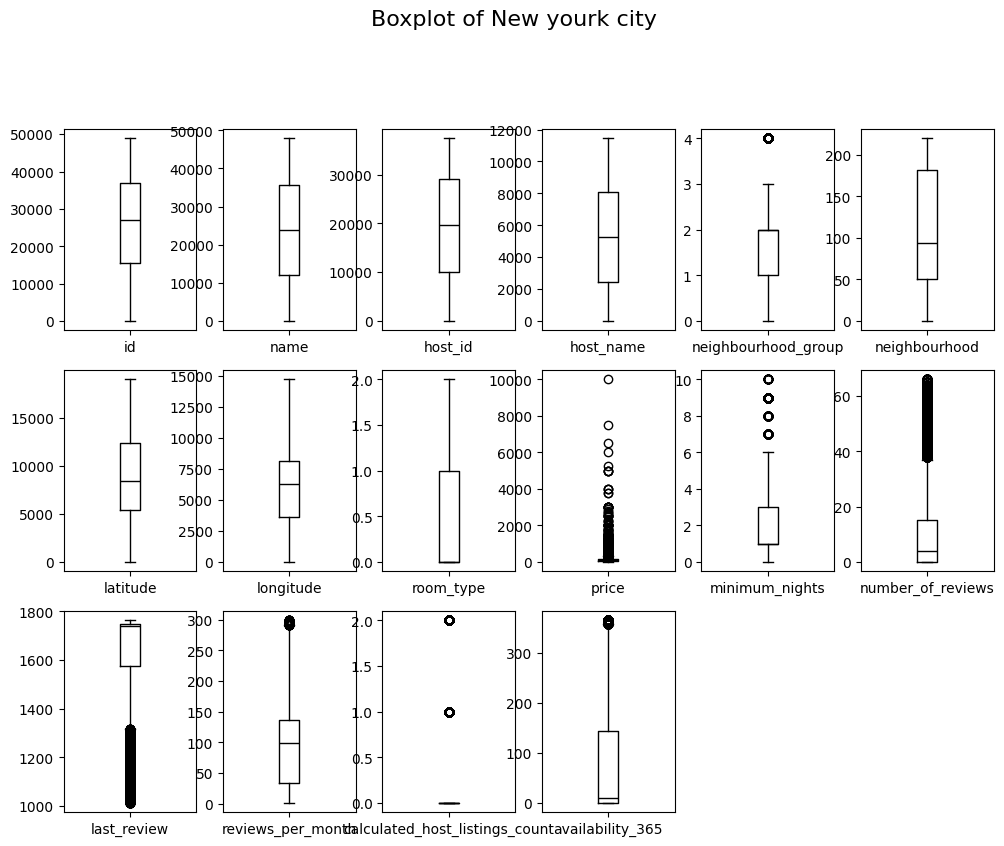

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,12),color='black')
plt.suptitle('Boxplot of New yourk city',fontsize=16)
plt.show()

#7.FEATURES ENGINEERING

Feature engineering is the process of transforming raw data into a format that machine learning models can better understand and utilize to improve their predictive performance. It involves creating, modifying, or selecting features (input variables) to maximize the model's effectiveness.


In [ ]:
# Create a new feature 'reviews'
df['reviews'] = df['number_of_reviews'] + df['last_review'] + 1
df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews
1,1,37443,3,4785,2,127,11521,3450,0,225,0,45,1715,37,1,355,1761
2,2,43528,13,2909,2,94,16012,7576,1,150,2,0,1748,137,0,365,1749
4,4,18681,18,5923,2,61,15154,7367,0,80,9,9,1532,9,0,0,1542
10,10,5498,28,6024,2,202,15555,5229,0,135,4,53,1747,42,0,6,1801
19,19,22619,65,9701,2,61,15029,6895,0,190,6,0,1748,137,1,249,1749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,48889,34950,29427,7135,3,105,5580,13828,1,65,0,0,1748,137,1,163,1749
48890,48890,11636,10255,9051,1,13,4320,6772,1,70,1,0,1748,137,1,9,1749
48891,48891,3511,8945,6776,1,28,6571,8420,1,40,3,0,1748,137,1,36,1749
48892,48892,42449,17488,4263,2,94,16395,6900,0,115,9,0,1748,137,0,27,1749


#8.DIMENSIONALITY REDUCTION

Dimensionality reduction is the process of reducing the number of input variables (features) in a dataset while retaining as much information as possible

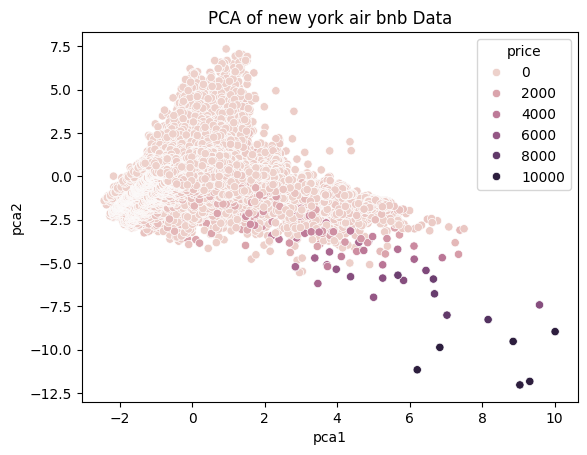

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features =['room_type','price','minimum_nights','number_of_reviews','reviews','calculated_host_listings_count','availability_365']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)   #covert the variables to 2 componates
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='price', data=df)
plt.title('PCA of new york air bnb Data')
plt.show()

#9.DATA SCALING
Data scaling is a preprocessing technique used in machine learning to normalize the range of independent variables.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df[['room_type_scaled','price_scaled','minimum_nights_scaled','number_of_reviews_scaled','reviews_scaled','calculated_host_listings_count_scaled','availability_365_scaled']] = scaler.fit_transform(df[['room_type','price','minimum_nights','number_of_reviews','reviews','calculated_host_listings_count','availability_365']])

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['room_type_scaled','price_scaled','minimum_nights_scaled','number_of_reviews_scaled','reviews_scaled','calculated_host_listings_count_scaled','availability_365_scaled']] = minmax_scaler.fit_transform(df[['room_type','price','minimum_nights','number_of_reviews','reviews','calculated_host_listings_count','availability_365']])

in data scaling we convert all the features to one scaling.we import minmaxscaler and standardscaler.

#10.INITIAL MODELNG AND HYPOTHESIS TESTING
Initial modeling refers to the process of preparing and analyzing a dataset to create the foundation for a machine learning or statistical model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


X = df[['room_type','minimum_nights','number_of_reviews','reviews','calculated_host_listings_count','availability_365']]   # Define features and target variable
y = df[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()   # Initialie and train the Linear Regression model
model.fit(X_train, y_train)


y_pred=model.predict(X_test)  #Make predictions onthe test set

Mean_sqrd_error=mean_squared_error(y_test,y_pred)       #average squared difference between the predicted values and the actual values
print(f"Mean_squared_error:{Mean_sqrd_error:.2f}")
Mean_abslt_error=mean_absolute_error(y_test,y_pred)
print(f"Mean_absolute_error:{Mean_abslt_error:.2f}")
r2=r2_score(y_test,y_pred)

print(f"R2:{r2:.2f}")

Mean_squared_error:30396.33
Mean_absolute_error:76.03
R2:0.13


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


X = df[['room_type','minimum_nights','number_of_reviews','reviews','calculated_host_listings_count','availability_365']]   # Define features and target variable
y = df[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()   # Initialie and train the DecisionTreeRegressor
model.fit(X_train, y_train)


y_pred=model.predict(X_test)  #Make predictions onthe test set

Mean_sqrd_error=mean_squared_error(y_test,y_pred)       #average squared difference between the predicted values and the actual values
print(f"Mean_squared_error:{Mean_sqrd_error:.2f}")
Mean_abslt_error=mean_absolute_error(y_test,y_pred)
print(f"Mean_absolute_error:{Mean_abslt_error:.2f}")
r2=r2_score(y_test,y_pred)

print(f"R2:{r2:.2f}")

Mean_squared_error:49380.74
Mean_absolute_error:94.29
R2:-0.42


In the last and major step in EDA intial modeling we have to train and test the data and make prediction also then we check the data with regressions linear regression and decition tree regression.

#11.DOCUMENTATION

In [ ]:
#summarize key findings
summary={'dataset shape':df.shape,
         'missing values':df.isnull().sum(),
         'correlation with price':df.corr()['price'].sort_values(ascending=False)
  }
print('EDA summary:')
for key,value in summary.items():
  print(f'{key}:{value}')

final_df=df[['room_type','minimum_nights','number_of_reviews','reviews','calculated_host_listings_count','availability_365']]

EDA summary:
dataset shape:(26159, 24)
missing values:id                                       0
name                                     0
host_id                                  0
host_name                                0
neighbourhood_group                      0
neighbourhood                            0
latitude                                 0
longitude                                0
room_type                                0
price                                    0
minimum_nights                           0
number_of_reviews                        0
last_review                              0
reviews_per_month                        0
calculated_host_listings_count           0
availability_365                         0
reviews                                  0
room_type_scaled                         0
price_scaled                             0
minimum_nights_scaled                    0
number_of_reviews_scaled                 0
reviews_scaled                           0
